**Classification of the Mnist handwritten digits dataset using Keras**

In [1]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=f78eb65662354ad330fadbfe6c1d14b9f849cf9227daf02544486459d0ba2f17
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [2]:

import matplotlib.pyplot as plt # plotting library
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
# import dataset
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import utils
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
n_classes = 10
# convert to one-hot vector
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
#  resize and normalize
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32')  /255
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compiling the sequential model
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam ,metrics=['accuracy'])
# Print the model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 activation_2 (Activation)   (None, 500)               0         
                                                         

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.1960 - accuracy: 0.9402 - val_loss: 0.1095 - val_accuracy: 0.9651
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0922 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0684 - accuracy: 0.9792 - val_loss: 0.0786 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0846 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0750 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 0.1006 - val_accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.0795 - val_accuracy

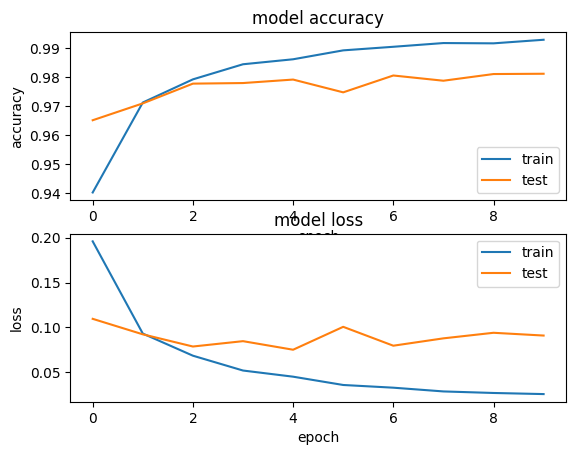

In [3]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,epochs=10,validation_data=(X_test, Y_test))

# plotting
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')